In [100]:
#importing seaborn, matplotlip and pandas libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
#reading and loading the dataset
df = pd.read_csv('customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [5]:
df.max()

invoice_no             I999994
customer_id            C999995
gender                    Male
age                         69
category                  Toys
quantity                     5
price                   5250.0
payment_method      Debit Card
invoice_date          9/9/2022
shopping_mall     Zorlu Center
dtype: object

In [6]:
df.min()

invoice_no            I100008
customer_id           C100004
gender                 Female
age                        18
category                Books
quantity                    1
price                    5.23
payment_method           Cash
invoice_date         1/1/2021
shopping_mall     Cevahir AVM
dtype: object

In [7]:
#grouping the data by category and calculating the median price
median_price = df.groupby('category')['price'].median()
median_price

category
Books                45.45
Clothing            900.24
Cosmetics           121.98
Food & Beverage      15.69
Shoes              1800.51
Souvenir             35.19
Technology         3150.00
Toys                107.52
Name: price, dtype: float64

In [8]:
#grouping the data by category and calculating the mean price
mean_price = df.groupby('category')['price'].mean()
mean_price

category
Books                45.568621
Clothing            901.084021
Cosmetics           122.448626
Food & Beverage      15.671948
Shoes              1807.388568
Souvenir             34.894345
Technology         3156.935548
Toys                107.733185
Name: price, dtype: float64

In [9]:
#grouping the data by category and calculating the standard deviation of price
std_price = df.groupby('category')['price'].std()
std_price

category
Books                21.492662
Clothing            424.225594
Cosmetics            57.458097
Food & Beverage       7.422176
Shoes               845.116269
Souvenir             16.564498
Technology         1481.559805
Toys                 50.364844
Name: price, dtype: float64

In [10]:
#selecting the columns and calculating the correalations
df[['age', 'quantity', 'price']].corr()

,age,quantity,price
age,1.000000,0.000667,0.001694
quantity,0.000667,1.000000,0.344880
price,0.001694,0.344880,1.000000


In [11]:
#calculating the kurtosis and skewness
kurtosis = df[['age', 'quantity', 'price']].kurtosis()
skew = df[['age', 'quantity', 'price']].skew()
print(kurtosis, skew)

age        -1.198354
quantity   -1.295893
price       6.168350
dtype: float64 age         0.009021
quantity   -0.001296
price       2.247433
dtype: float64


In [12]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [13]:
group_age = df.groupby('age')
for age, age_df in group_age:
    print(age)
    print(age_df)


18
      invoice_no customer_id  gender  age   category  quantity    price  \
48       I269690     C126436    Male   18  Cosmetics         3   121.98   
109      I293215     C166635    Male   18  Cosmetics         4   162.64   
221      I232338     C545065  Female   18   Clothing         4  1200.32   
405      I183840     C246719  Female   18   Clothing         1   300.08   
514      I140596     C291641  Female   18  Cosmetics         2    81.32   
...          ...         ...     ...  ...        ...       ...      ...   
99240    I118426     C178658    Male   18   Clothing         4  1200.32   
99281    I720327     C259264  Female   18   Clothing         5  1500.40   
99338    I196954     C212797  Female   18   Clothing         1   300.08   
99364    I751798     C250277  Female   18      Shoes         4  2400.68   
99404    I311155     C651683    Male   18   Clothing         5  1500.40   

      payment_method invoice_date   shopping_mall  
48        Debit Card     7/2/2022    Zorlu C

In [14]:
group_age.get_group(21)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
142,I362306,C143343,Female,21,Clothing,1,300.08,Credit Card,19/09/2022,Metrocity
195,I220863,C131497,Male,21,Books,4,60.60,Cash,22/07/2021,Mall of Istanbul
230,I783231,C771066,Female,21,Clothing,5,1500.40,Debit Card,5/1/2022,Cevahir AVM
244,I818298,C204632,Male,21,Clothing,5,1500.40,Debit Card,21/08/2022,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99094,I905081,C278230,Male,21,Food & Beverage,2,10.46,Credit Card,9/4/2021,Metropol AVM
99204,I264904,C285285,Female,21,Technology,4,4200.00,Credit Card,6/12/2021,Forum Istanbul
99226,I516326,C286195,Male,21,Cosmetics,1,40.66,Cash,11/8/2022,Metrocity
99234,I316025,C288067,Female,21,Technology,4,4200.00,Cash,23/06/2021,Mall of Istanbul


In [15]:
group_box = group_age.mean('age')
group_box

,quantity,price
age,,
18,2.992408,656.975933
19,2.984504,668.985780
20,2.985358,678.743671
21,3.027221,677.850082
22,2.997562,694.415529
23,3.012652,670.947217
24,3.013151,700.899868
25,2.959206,689.244627
26,2.991561,701.343238


In [16]:
group_plot = group_box.reset_index()
group_plot


,age,quantity,price
0,18,2.992408,656.975933
1,19,2.984504,668.985780
2,20,2.985358,678.743671
3,21,3.027221,677.850082
4,22,2.997562,694.415529
5,23,3.012652,670.947217
6,24,3.013151,700.899868
7,25,2.959206,689.244627
8,26,2.991561,701.343238
9,27,3.061026,708.155077


In [17]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce', dayfirst=True)
df['sales'] =df['quantity'] * df['price']
df['year'] =df ['invoice_date'].dt.to_period('Y').astype(str)
yearly_sales = df.groupby('year')['sales'].sum().reset_index()

# defining a function and plotting line graph
def lineplot():
    sns.lineplot(x='year', y='sales', label = 'Total sales per year', data = yearly_sales)
    plt.xlabel('Year')
    plt.ylabel('Total sales')
    plt.legend(loc='lower left')
    plt.title('Line Plot showing total sales of each year')
    plt.savefig('line_graph.png')
    plt.show()


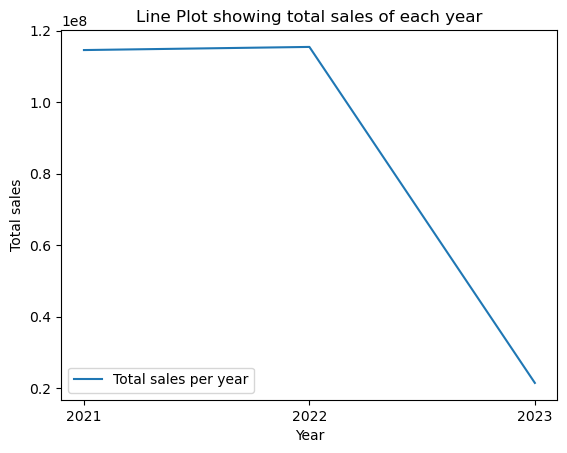

In [18]:
#calling the lineplot function
lineplot()


In [19]:
#defining a function histogram_price and plotting a histogram graph
def histogram_price():
    sns.histplot(df['price'], bins=20, kde=True)
    plt.title('Histogram showing price')
    plt.savefig('histogram_graph.png')
    plt.show()

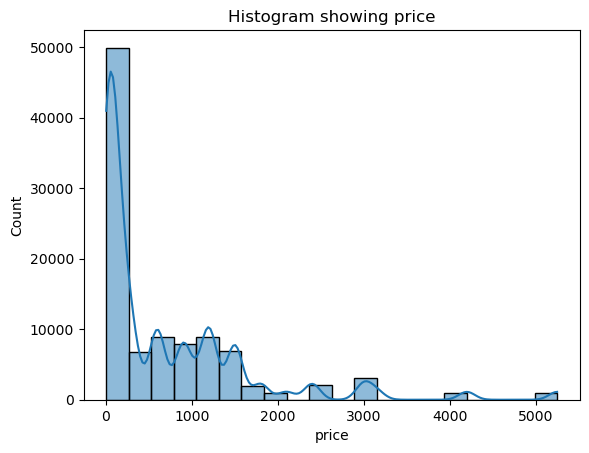

In [20]:
#calling the histogram_price function 
histogram_price()

In [21]:
#calculating the total sales
#Multiplying quantity and price from the dataframe
df['sales'] = df['quantity']* df['price']

In [22]:
#grouping the columns of dataframe, aggretting the sales and resetting the index
grouped_df = df.groupby(['category', 'gender'])['sales'].sum().reset_index()
grouped_df

,category,gender,sales
0,Books,Female,489314.70
1,Books,Male,345238.20
2,Clothing,Female,68251695.60
3,Clothing,Male,45745095.44
4,Cosmetics,Female,4066772.54
5,Cosmetics,Male,2726090.36
6,Food & Beverage,Female,505322.60
7,Food & Beverage,Male,344212.45
8,Shoes,Female,39425167.30
9,Shoes,Male,27128284.17


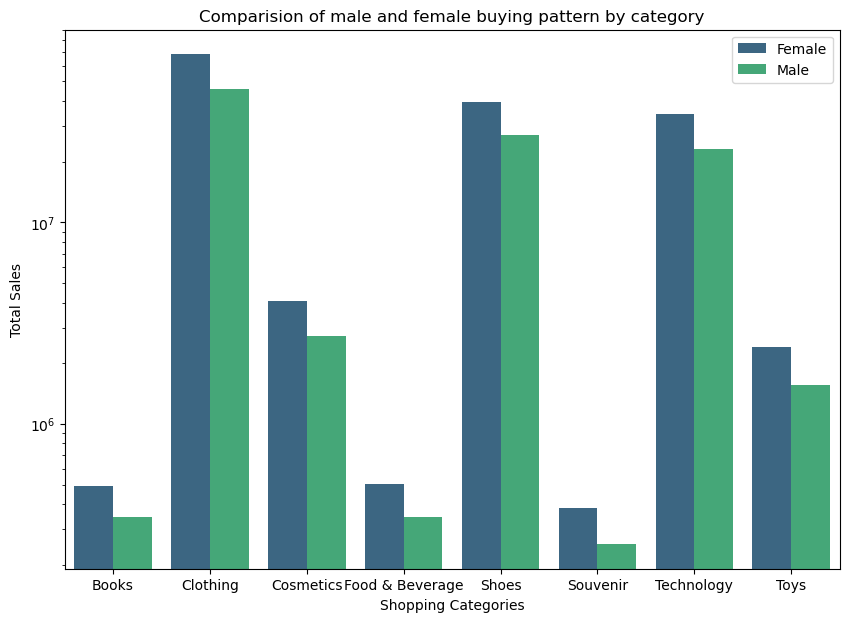

In [23]:
#plotting the bar chart
plt.figure(figsize = (10, 7))
sns.barplot(x='category', y='sales', hue='gender', data = grouped_df, palette = 'viridis')
plt.xlabel('Shopping Categories')
plt.ylabel('Total Sales')
plt.legend(loc='upper right')
plt.yscale('log')
plt.title('Comparision of male and female buying pattern by category')
plt.savefig('barplot.png')
plt.show()


In [ ]:
#confusion matrix

In [72]:
df['age'].mean()

43.42708909377922

In [74]:
df['price'].mean()

689.2563209226097

In [76]:
condition_price = df['price'] > 689
df['avg_price_bool'] = condition_price

In [111]:
condition_age = df['age'] < 43
df['avg_age_bool'] = condition_age

In [113]:
y_true = df['avg_age_bool']
y_pred = df['avg_price_bool']

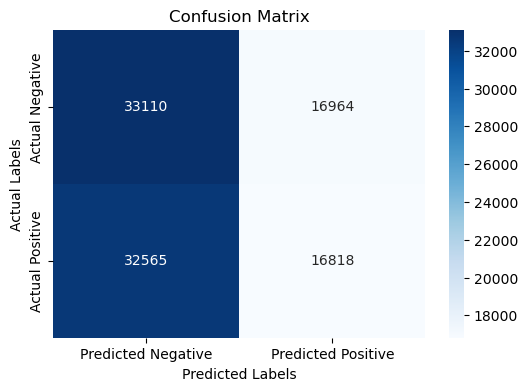

In [117]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.savefig('confusion_matrix.png')
plt.show()